# Ondes internes et effet de Foehn.

**Enseignement CLAT à l'ENSEEIHT - Benoît Hesse**

## Plan de la présentation:
* Présentation générale du format H5P
* Description de l'effet de foehn + animation flux sud/nord sur les pyrénées
* Equations des ondes internes / de la CLA
* Approximation de Boussinesq, approximation en montagne
* Analogie avec les cellules de Hadley et la ZCIT (Charlotte)
* Génération d'ondes internes par l'effet de foehn (Benoît)

## Effet de Foehn - explications
En présence d'une stratification, des ondes internes peuvent exister et se propager dans la couche limite atmosphérique. Ces oscillations peuvent naître d'une perturbation dans la stratification en densité de cette couche de l'atmopshère. Quand ces ondes sont générés par la topographie ou le relief comme une chaîne de montagnes, on parle d'ondes orographiques.
En effet lorsque une masse d'air en basse couche rencontre un obstacle dû au relief, elle subit un forçage et la masse d'air s'élève. La masse subit donc un refroidissement adiabatique sans apport d'humidité jusqu'à, dans certains cas, atteindre la <u>saturation</u>, l'eau peut ainsi condenser puis précipiter sur le versant amont de la montagne réchauffant ainsi l'atmosphère. Si il y a condensation et précipitation, on parle de Foehn humide, dans le cas contraire on parle de Foehn sec.

Si la couche est stable au dessus de la montagne alors l'air ayant subi le forçage ne peut plus s'élever, la masse descend donc sur le versant aval et subit alors lors de la subsidence une compression adiabatique. Ainsi, l'air se réchauffe ce qui explique les fortes températures relevées lors de ces événements. 

Regardons maintenant ce qui se passe avec les équations:

Tout d'abord, supposons que la couche limite atmosphérique est stratifié et stable: ${\partial\theta\over \partial z} > 0 $
avec $\theta = {T({P_0 \over P})^{R_a\over c_p}}$ la température potentielle
où:
* $T$: la température de la masse d'air
* $P_0$: la pression standart de l'atmosphère
* $P$: la pression de la masse d'air
* $R$: la constante des gaz parfaits
* ${M_{air}}$: la masse molaire de l'air

On se place dans l'approximation de Boussinesq c'est-à-dire l'état thermodynamique de l'atmosphère s'écarte peu d'un état hydrostatique et adiabatique que l'on qualifie d'état de référence. On obtient les approximations suivantes:
 * Etat au repos $\vec{u_r} = 0$
 * Etat hydrostatique ne dépendant que de z
 * Etat adiabatique: $\theta _r(z) = Cste = \theta_0$

Ces approximations permettent d'obtenir une formulation incompressible des équations de Navier-Stokes appelée **Système de Boussinesq**


In [3]:
#Importation des packages nécessaires à la résolution numérique
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Numéro de Froude

Les météorologues utilisent le nombre de Froude pour déterminer si les conditions sont réunis pour permettre l'existence d'ondes de gravités internes lors du passage d'une masse d'air sur un relief comme une chaîne de montagne. Dans le cas général, le nombre de Froude est le rapport entre l'énergie cinétique et l'énergie potentielle. Dans notre cas, il est le rapport entre la vitesse horizontale de la masse d'air et l'énergie potentielle à surmonter dépendant de la stabilité de la masse d'air. La masse d'air oscille ensuite comme une onde interne à la fréquence de Brunt-Väisälä N.

Le nombre de Froude s'exprime donc: $$Fr = {u \over Nh}$$ avec $${N=\sqrt{{g\over\theta}{\partial\theta\over\partial z}}}$$

On peut interpréter le nombre de Froude tel que:
* $Fr<1$ : La masse d'air contourne ou est bloquée par le relief
* $Fr = 1$ : La masse d'air oscille en aval du relief
* $Fr>1$ : La masse d'air oscille et déferle en aval du relief

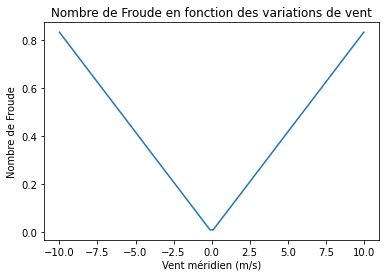

Text(0, 0.5, 'Nombre de Froude')

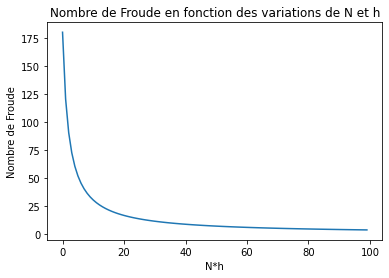

In [4]:
#Figure du nombre de froude avec vent variant et Nh fixe
N = 0.012 #Hz (valeur typique de la fréquence de Brunt-Vaisala)
h = 1000 #m

#On prends des vitesses allant de -10 m.s-1 (vent de Nord) à 10 m.s-1 (vent de Sud)
U = np.linspace(-10.0,10.0,100) #Vecteur de vent méridien
Fr = np.abs(U)/(N*h) #Tableau des valeurs du nombre de Froude

plt.figure()
plt.plot(U,Fr,label='Nombre de Froude en fonction des variations de vent')
plt.title('Nombre de Froude en fonction des variations de vent')
plt.xlabel('Vent méridien (m/s)')
plt.ylabel('Nombre de Froude')
plt.show()

#Figure du nombre de Froude en faisant varier Nh 
U = 18.0 #vent méridien en m/s
Nb=np.linspace(0.1,5.0,100) #On fait varier le dénominateur entre 0.1 et 5
Fr=np.abs(U)/Nb #Tableau des valeurs du nombre de Froude

plt.figure()
plt.plot(Fr)
plt.title('Nombre de Froude en fonction des variations de N et h')
plt.xlabel('N*h')
plt.ylabel('Nombre de Froude')

## Représentation d'une montagne

Dans le cadre de la modélisation des ondes internes ou de l'effet de Foehn, on étudie le cas d'une masse d'air passant sur un relief isolé vu en coupe méridienne (selon l'axe Nord-Sud). Pour représenter plus en détail les variations du nombre de Froude, on modélisera une montagne à l'aide d'une fonction gaussienne:
$$ h(x) = {H_0\over \sqrt{ 2\pi}}e^{-x^2\over8}$$

Dans le cadre de l'étude des ondes de gravité internes, on modélisera le relief par une fonction périodique et sinusoïdale:
$$ h(z) = H_m*sin(kx) $$

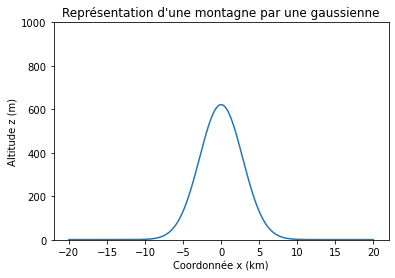

In [5]:
#Représentation d'une montagne à l'aide d'une gaussienne
def gaussienne(x):
    """x: type numpy"""
    #On ajoute un incrément pour obtenir des valeurs strictement supérieures à 1
    return 4400*(np.exp(-(x**2)/16)/np.sqrt(np.pi*2*8)) +1.0 

x=np.linspace(-20,20,2001)
y=gaussienne(x)
plt.plot(x,y,label='Distribution normale')
plt.ylim(0,1000)
plt.xlabel('Coordonnée x (km)')
plt.ylabel('Altitude z (m)')
plt.title("Représentation d'une montagne par une gaussienne")
plt.show()

Text(0.5, 1.0, "au passage d'une montagne")

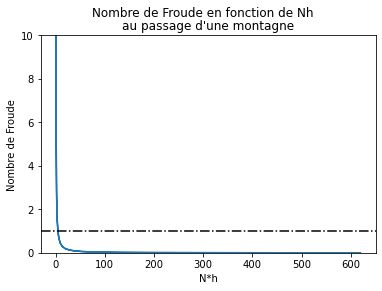

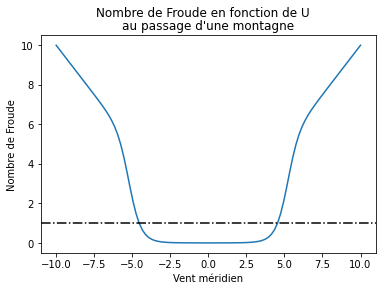

In [6]:
#Figure du numéro de Froude en faisant varier Nh et U dans le cas d'une montagne.

U = np.linspace(-10.0,10.0,100)
h=gaussienne(np.linspace(-20,20,100))
N=1 #np.linspace(0.01,10,10)
Nb=N*h
Fr=np.abs(U)/Nb
plt.figure()
plt.plot(Nb,Fr,label='Nombre de Froude en fonction des variations de h')
plt.xlabel('N*h')
plt.ylabel('Nombre de Froude')
plt.ylim(0,10)
plt.axhline(1,ls='-.',c='Black')
plt.suptitle("Nombre de Froude en fonction de Nh")
plt.title("au passage d'une montagne")
#plt.legend()

plt.figure()
plt.plot(U,Fr,label='Nombre de Froude en fonction des variations de vent')
plt.xlabel('Vent méridien')
plt.ylabel('Nombre de Froude')
plt.axhline(1,ls='-.',c='Black')
plt.suptitle("Nombre de Froude en fonction de U")
plt.title("au passage d'une montagne")
#plt.legend()



In [7]:
##On fixe les paramètres pour calculer le nombre de Froude puis on le calcule.

u=np.arange(2,20,2) #On fait varier la vitesse du vent méridien
N=np.linspace(0.012,10,len(u)) #On fait varier la fréquence de Brunt-Väisälä
x = np.linspace(-10,10,len(u)) #Tableau des coordonnées méridiennes
h=gaussienne(x) #Tableau des valeurs représentant une montagne isolée

fig_dir='C:\\Users\\bhess\\OneDrive\\Images\\python\\' #Chemin utilisé pour sauvegarder les figures puis l'animation

Fr=np.zeros((len(u),len(u),len(u))) #Matrice des valeurs du nombre de Froude
mat_UN=np.zeros((len(u),len(u),2)) #Matrice contenant les valeurs de U et N correspondant au nombre de Froude associé.
#Ainsi à chaque ligne est associé une valeur de U et à chaque colonne une valeur de N

for i in range(len(u)): #On calcule les valeurs du nombre de Froude
    for j in range(len(u)):
        Fr[i,j]=u[i]/(N[j]*h)
        mat_UN[i,j]=[u[i],N[j]]

In [8]:
##Fonctions utiles pour afficher et animer les variations du nombre de Froude
def plot_Fr(Fr,mat_UN,i,j,fig_dir,N_variant = False): 
    """
    Grâce à cette fonction, on peut choisir quelle ligne ou quelle colonne on veut afficher.
    N_variant est un booléen (par défaut sur False), si sa valeur est True, il affichera toutes les valeurs de Fr 
    avec un U fixé et un N variant. Dans le cas contraire U varie et N est fixé.
    """
    
    if N_variant:
        for k in range(len(Fr)):
            plt.figure(figsize=(7,7))
            plt.plot(x,Fr[k,j,:])
            plt.title('U= '+str(mat_UN[i,k,0])+', N= '+str(mat_UN[i,k,1]),fontsize=20)
            plt.ylim(0,80)
            plt.xlabel('Coordonnée méridienne X (km)',fontsize=18)
            plt.ylabel('Nombre de Froude Fr',fontsize=18)
            plt.savefig(fig_dir+r'u'+str(i)+'_n'+str(k)+'.png')
    else:
        for l in range(len(Fr)):
            plt.figure(figsize=(7,7))
            plt.plot(x,Fr[i,j,:])
            plt.title('U= '+str(mat_UN[l,j,0])+', N= '+str(mat_UN[l,j,1]),fontsize=20)
            plt.ylim(0,80)
            plt.xlabel('Coordonnée méridienne X (km)',fontsize=18)
            plt.ylabel('Nombre de Froude Fr',fontsize=18)
            plt.savefig(fig_dir+r'u'+str(l)+'_n'+str(j)+'.png')
    return True

def animate(fig_dir,i,j,N_variant):
    # Create new figure for GIF
    fig, ax = plt.subplots()

    # Ajuster la figure pour que le GIF n'ait pas d'espace blanc sur les côtés
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis('off')
    ims = []
    if N_variant:
        for k in range(len(Fr)):
            im = ax.imshow(plt.imread(fig_dir+rf'u{i}_N{k}.png'), animated = True)
            ims.append([im])
        ani = animation.ArtistAnimation(fig, ims, interval=600)
        ani.save(fig_dir+rf'animation_u{i}_N.gif')
    else:
        for l in range(len(Fr)):
            im = ax.imshow(plt.imread(fig_dir+rf'u{l}_N{j}.png'), animated = True)
            ims.append([im])
        ani = animation.ArtistAnimation(fig, ims, interval=600)
        ani.save(fig_dir+rf'animation_u_N{j}.gif')
            

MovieWriter ffmpeg unavailable; using Pillow instead.


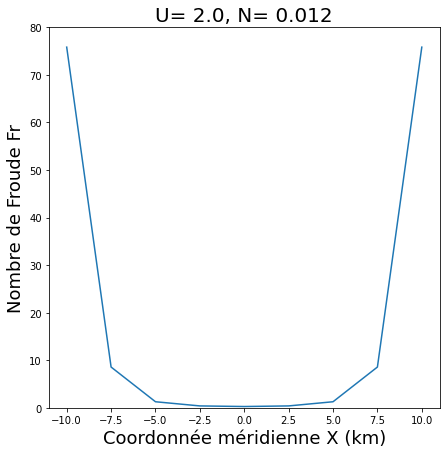

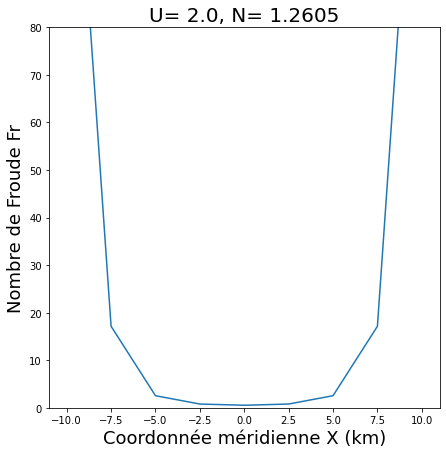

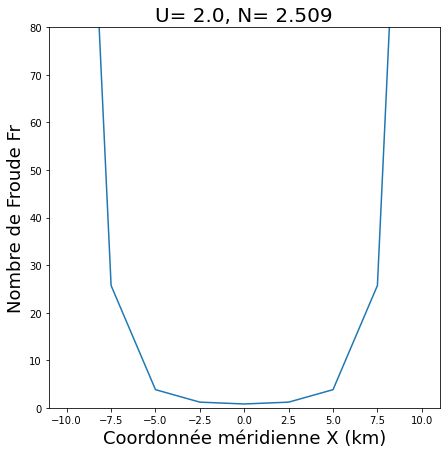

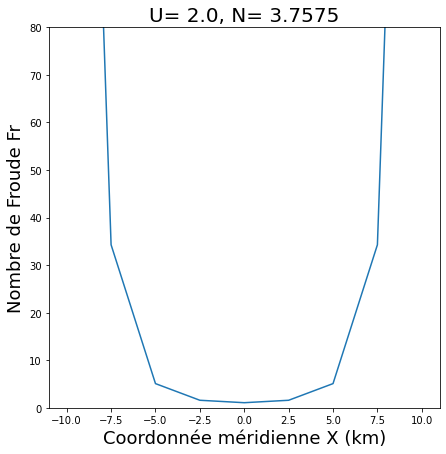

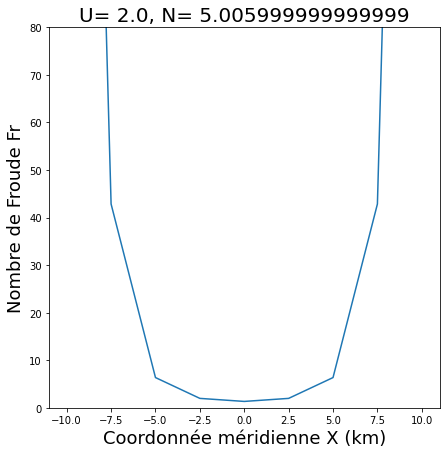

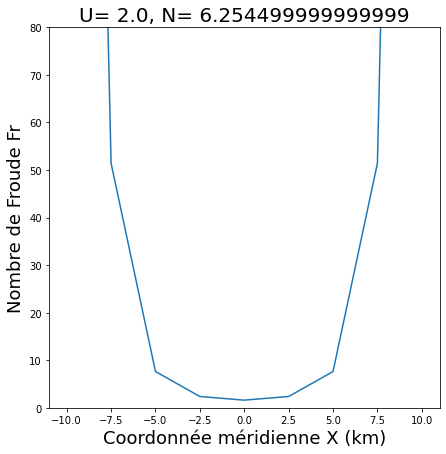

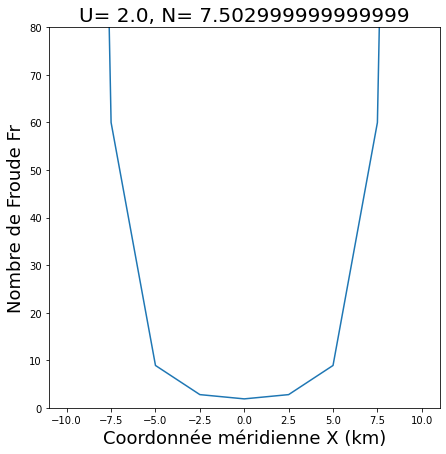

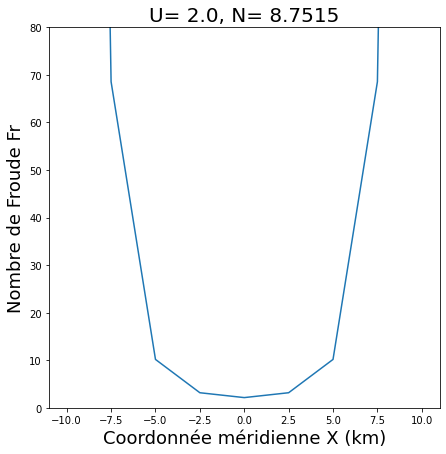

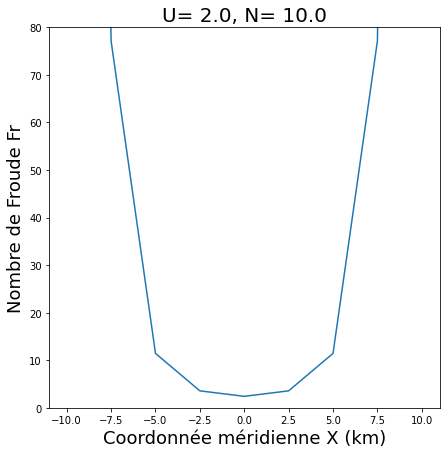

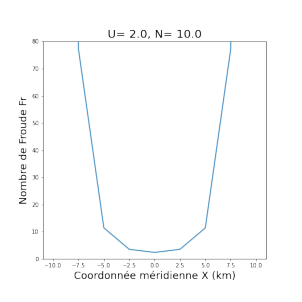

In [9]:
#On fixe des paramètres pour afficher les valeurs de Fr
i,j=0,0
N_variant = True #On fait varier N mais pas U
plot_Fr(Fr,mat_UN,i,j,fig_dir,N_variant)
animate(fig_dir,i,j,N_variant)


## Modélisation d'une onde stationnaire généré par effet de Foehn

Dans le cadre de l'étude des ondes de gravité internes, on modélisera le relief par une fonction périodique et sinusoïdale:

$$ h(z) = H_m*sin(kx) $$

Dans ce cas l'onde interne est dite stationnaire soit :

$$ w = w_0* cos(kx+mz)$$

In [10]:
#Modélisation d'une onde stationnaire au passage d'un relief périodique
#Paramètre de la simulation
k= 3
m= 5
Wm= 100
nb_ptx=300
nb_ptz=300
z=5

fig_dir=

def onde_stationnaire(x,z):
    L=np.zeros((nb_ptx))
    for i in range(nb_ptx):
         L[i]=Wm*np.cos(k*x[i]+m*z)+z
    return L

x=np.linspace(0,700,nb_ptx)
w=np.zeros((nb_ptx,4))
for i in range(4):
    w[:,i] = onde_stationnaire(x,500*i)
print(np.shape(y))


plt.plot(x,w[:,1],label="z=500",c="r")
plt.plot(x,w[:,2],label="z=1000",c="g")
plt.plot(x,w[:,3],label="z=1500",c="b")

plt.legend()

#plt.plot(x,Wm*np.cos(k*x+m*z),c="r")
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title("Onde stationnaire au passage d'une montagne")
plt.savefig(figure_dir+'onde_stationnaire.png',dpi=100)
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_35240/4241404263.py, line 10)